In [5]:
import cv2
import numpy as np
from glob import glob
from joblib import Parallel, delayed
import psutil
import matplotlib.pyplot as plt
import scipy
import scipy.io as io
import pickle
from scipy.ndimage.filters import gaussian_filter

In [2]:
path = '/mnt/home/hheat/USERDIR/counting-bench/data'
train_images = path + '/images'
test_images = path + '/test_images/images'
anno = path + '/annotation'
density_maps = path + '/dmaps'
sm_train_images = path + '/sm_train_images'
sm_test_images = path + '/sm_test_images'
sm_dmaps = path + 'sm_dmaps'

In [3]:
train_fp = glob(sm_train_images+'/*.jpg')
train_fp[0]

'/mnt/home/hheat/USERDIR/counting-bench/data/sm_train_images/sm_03_151.jpg'

In [14]:
def open_image(p):
    image = cv2.imread(p)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.
    return image

def plot_data(img,points=None,fig_size=(18,12)):
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    if isinstance(points,np.ndarray):
        for point in points.astype(int):
            cv2.circle(img, tuple(point), radius=0,color=(0, 1, 0), thickness=10)
    ax.imshow(img)

In [7]:
anno + '/03_151.mat'

'/mnt/home/hheat/USERDIR/counting-bench/data/annotation/03_151.mat'

In [8]:
mat = io.loadmat(anno + '/03_151.mat')
points = mat['annotation'].astype(int)

In [10]:
points.shape

(514, 2)

In [16]:
points[0]

array([ 166, 1162])

In [17]:
points[1]

array([ 194, 1118])

In [25]:
points[:,0] = points[:,0] / 2720 * 1360
points[:,1] = points[:,1] / 1530 * 784

In [ ]:
plot_data(img,points)

In [26]:
img = open_image(train_fp[0])

In [12]:
img.shape

(784, 1360, 3)

In [15]:
new_img = cv2.resize(img,(1360,784),cv2.INTER_NEAREST)
new_img.shape

(784, 1360, 3)

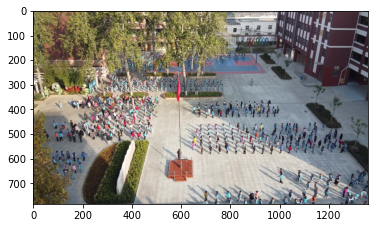

In [13]:
plt.imshow(img)

In [22]:
cv2.imwrite(sm_train_images+'/test.jpg',new_img)

True

In [23]:
i = open_image(sm_train_images+'/test.jpg')
i.shape

(784, 1360, 3)

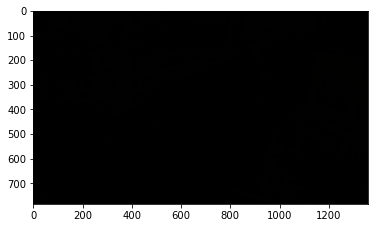

In [24]:
plt.imshow(i)

In [25]:
img = cv2.imread(train_fp[0])
new_img = cv2.resize(img,(1360,784),cv2.INTER_NEAREST)
cv2.imwrite(sm_train_images+'/test.jpg',new_img)

True

In [26]:
i = open_image(sm_train_images+'/test.jpg')
i.shape

(784, 1360, 3)

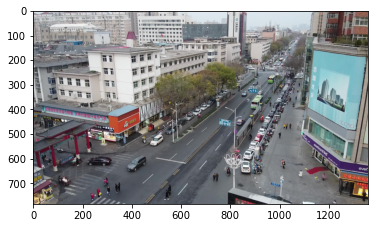

In [27]:
plt.imshow(i)

In [28]:
train_fp[0]

'/mnt/home/hheat/USERDIR/counting-bench/data/images/11_233.jpg'

In [29]:
train_fp[0].split('/')[-1]

'11_233.jpg'

In [30]:
sm_train_images + '/sm_' +  train_fp[0].split('/')[-1]

'/mnt/home/hheat/USERDIR/counting-bench/data/sm_train_images/sm_11_233.jpg'

# Code

In [34]:
def resize_image(path,des=sm_train_images,size=(784,1360),interpolation=cv2.INTER_NEAREST):
    img = cv2.imread(path)
    new_img = cv2.resize(img,(1360,784),interpolation)
    outp = des + '/sm_' + path.split('/')[-1]
    cv2.imwrite(outp,new_img)

In [ ]:
%%time
Parallel(n_jobs=psutil.cpu_count(),verbose=10)(
    (delayed(resize_image)(fp) for fp in glob(train_images))
)